<a href="https://colab.research.google.com/github/cyrus723/my-first-binder/blob/main/jupyter_widgets1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Jupyter Widgets**

## This is what I learned from SciPy 2022 Conference held in Austin during July. I met Itay Dafna from Bloomberg who showed how to intergrate Jupyter Widgets in presenting market data.

### A Python widget is an object that represents a control on the front end, like a slider. A single control can be displayed multiple times - they all represent the same python object.

In [ ]:
!pip install ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import ipywidgets as widgets

In [ ]:
slider = widgets.FloatSlider(
    value=8.0,
    min=5.0,
    max=10.0,
    step=0.1,
    description='Input:',
)

slider

FloatSlider(value=8.0, description='Input:', max=10.0, min=5.0)

In [ ]:
import ipywidgets as ipw

In [ ]:
def f(x):
    print(x * x)

In [ ]:
widgets.interact(f, x=(0, 100, 1));

interactive(children=(IntSlider(value=50, description='x'), Output()), _dom_classes=('widget-interact',))

In [ ]:
pip install quandl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

import quandl as ql
%matplotlib inline

yield_ = ql.get("USTREASURY/YIELD")
yield_

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
1990-01-02,NaN,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1990-01-03,NaN,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
1990-01-04,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
1990-01-08,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31,0.03,0.13,0.22,0.49,0.78,1.18,1.39,1.62,1.75,1.79,2.17,2.11
2022-02-01,0.04,0.10,0.19,0.48,0.78,1.18,1.39,1.63,1.76,1.81,2.19,2.12
2022-02-02,0.04,0.10,0.19,0.45,0.76,1.16,1.38,1.60,1.74,1.78,2.17,2.11


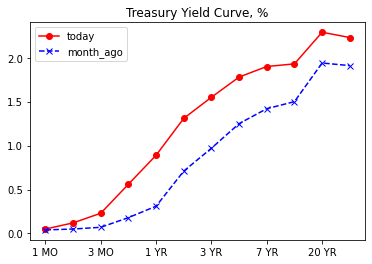

In [ ]:
today = yield_.iloc[-1,:]
month_ago = yield_.iloc[-30,:]
df = pd.concat([today, month_ago], axis=1)
df.columns = ['today', 'month_ago']

df.plot(style={'today': 'ro-', 'month_ago': 'bx--'}
        ,title='Treasury Yield Curve, %');

# A simple Python zero-coupon bond calculator #
A zero-coupon bond is a bond that does not pay any periodic interest except on maturity, where the principal or face value is repaid. Zero-coupon bonds are also called pure discount bonds.
<br>
$$price \ of \ zero \ coupon \ bond = \frac{Face\ Value}{(1+YTM)^t} $$
<br>


#####LaTex:  https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd

A coupon bond is a bond that pays periodic interests plus par value on maturity. A price of a bond is the sum of all present values of coupon and principal. 
<br>
$$price \ of \ a \ coupon \ bond = \Sigma \frac{Coupon}{(1+YTM)^t} + \frac{Par \ Value}{(1 + YTM)^t} 
$$
<br><p>

##### In order to find YTM, the following code is use scipy optimize.Newton iterative process.
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html


In [ ]:
def bondprice(ytm, period, par, coupon):
  price_bond = par*coupon/2*(1-(1+ytm/2)**(-2*period))/(ytm/2) + par/(1+ytm/2)**(2*period)
  print("${:.2f}".format(price_bond))


In [ ]:
bondprice(0.09, 20, 1000, 0.08)

$907.99


In [ ]:
def bondprice2(ytm, period, par, coupon):
  price_bond = par*coupon/2*(1-(1+ytm/2)**(-2*period))/(ytm/2) + par/(1+ytm/2)**(2*period)
  return price_bond

In [ ]:
import pandas as pd
import numpy as np
yield_b = np.linspace(0.03, 0.7, num=69)
#yield_b

In [ ]:
price_b = np.zeros([69,1])
price_b.shape


(69, 1)

In [ ]:
for ind in range(3, 72):
  price_b[ind-3]=(bondprice2(ind/100, period=2, par=1000, coupon=0.08))

#print(price_b)
print(yield_b.shape)
print(price_b.shape)

(69,)
(69, 1)


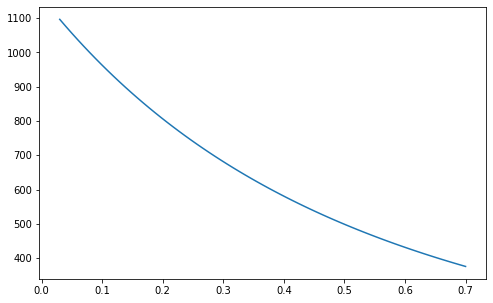

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 5]
plt.plot(yield_b, price_b)
plt.show()


In [ ]:
widgets.interact(bondprice, ytm=(0.05, 0.7, 0.01), period=(1,30, 1), par=(100,1000, 100), coupon=(0.05, 0.7, 0.01))

interactive(children=(FloatSlider(value=0.37, description='ytm', max=0.7, min=0.05, step=0.01), IntSlider(valu…

<function __main__.bondprice>

In [ ]:
import scipy.optimize as optimize

def bond_ytm(price, par, T, coup, freq=2, guess=0.05):
    freq = float(freq)
    periods = T*2
    coupon = coup/100.*par
    dt = [(i+1)/freq for i in range(int(periods))]
    ytm_func = lambda y: \
        sum([coupon/freq/(1+y/freq)**(freq*t) for t in dt]) +\
        par/(1+y/freq)**(freq*T) - price
    
    return optimize.newton(ytm_func, guess)

In [ ]:
# a 5.75% bond that will mature in 1.5 years with a par value of $100. The price is $95.0428. and coupons are paid semiannually. YTM=9.3692%
ytm = bond_ytm(price=100, par=100, T=1.5, coup=5.75, freq=2)
print("{:.4f}%".format(ytm*100))

In [ ]:
# %load solutions/intro/intro-example.py

In [ ]:
!pip install bqplot

In [ ]:
import numpy as np
import bqplot as bq

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [ ]:
xs = bq.LinearScale()
ys = bq.LinearScale()
x = np.arange(100)
y = np.cumsum(np.random.randn(2, 100), axis=1) #two random walks

line = bq.Lines(x=x, y=y, scales={'x': xs, 'y': ys}, colors=['red', 'green'])
xax = bq.Axis(scale=xs, label='x', grid_lines='solid')
yax = bq.Axis(scale=ys, orientation='vertical', tick_format='0.2f', label='y', grid_lines='solid')

fig = bq.Figure(marks=[line], axes=[xax, yax], animation_duration=1000)
display(fig)

In [ ]:
# update data of the line mark
line.y = np.cumsum(np.random.randn(2, 100), axis=1)

In [ ]:
pip install ipympl

In [ ]:
%matplotlib ipympl

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import VBox, FloatSlider

In [ ]:
with plt.ioff():
    fig, ax = plt.subplots()

x1 = np.linspace(0, 20, 500)

slider = FloatSlider(
    value=1.0,
    min=0.02,
    max=2.0
)

lines = plt.plot(x1, np.sin(slider.value  * x1))

def update_lines(change):
    lines[0].set_data(x1, np.sin(change.new * x1))
    fig.canvas.draw()

slider.observe(update_lines, names='value')

VBox([slider, fig.canvas])

In [ ]:
with plt.ioff():
    fig, ax = plt.subplots()

#x1 = np.linspace(0, 20, 500)
x1 = np.linspace(0.03, 0.5, num=50)

slider = FloatSlider(
    value=1.0,
    min=0.02,
    max=2.0
)

#lines = plt.plot(x1, np.sin(slider.value  * x1))
lines = plt.plot(x1, price_b)

def update_lines(change):
    lines[0].set_data(x1, np.sin(change.new * x1))
    fig.canvas.draw()

slider.observe(update_lines, names='value')

VBox([slider, fig.canvas])

## Additional reading

### Behind the scenes

Behind the scenes, even pure Python widgets are composed of two pieces:

+ Python, which runs in the notebook kernel.
+ JavaScript, which runs in the browser.

When writing your own widgets, that means making a choice: write only in Python or write in both Python and Javascript.

Which to choose depends on what you are trying to accomplish. This tutorial will focus on writing your own widgets in pure Python. An example of a pure-Python package that includes some interesting interfaces is [reducer](http://reducer.readthedocs.io), a package for calibrating astronomical data.

### Jupyter widgets as a framework

Jupyter widgets forms a framework for representing python objects interactively. Some large open-source interactive controls based on Jupyter widgets include:

 - [bqplot](https://github.com/bqplot/bqplot/blob/master/examples/Index.ipynb) - 2d plotting library in which everything displayed is a widget
 - [ipympl](https://github.com/matplotlib/ipympl) - widget backend for [matplotlib](https://matplotlib.org/3.2.2/contents.html) graphics
 - [pythreejs](https://pythreejs.readthedocs.io/en/stable/index.html) - low-level 3d graphics library
 - [ipyvolume](https://ipyvolume.readthedocs.io/en/latest/) - 3d plotting and volume rendering
 - [ipyleaflet](https://ipyleaflet.readthedocs.io/en/latest/)_ - interactive maps
 - [ipywebrtc](https://github.com/maartenbreddels/ipywebrtc) - video streaming
 - [ipysheet](https://ipysheet.readthedocs.io/en/latest/) - interactive spreadsheets
 - [ipytree](https://github.com/QuantStack/ipytree) - tree for viewing hierarchical material
 - [ipycanvas](https://ipycanvas.readthedocs.io/en/latest/?badge=latest) - interactive drawing in a notebook
 - [ipyevents](https://github.com/mwcraig/ipyevents/blob/master/doc/Widget%20DOM%20Events.ipynb) - capture mouse/keyboard events on a widget
 - ...